In [1]:
!pip install git+https://github.com/kunguz/odak.git

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Cloning https://github.com/kunguz/odak.git to /tmp/pip-req-build-fk89bsft
  Running command git clone -q https://github.com/kunguz/odak.git /tmp/pip-req-build-fk89bsft


In [2]:
import odak
import torch 
import numpy as np 
import sys
import odak.learn.raytracing as ODL
import matplotlib.pyplot as plt
import math
import odak.raytracing as raytracer
import odak.tools as tools
import odak.raytracing as raytracer

In [65]:
from odak.raytracing.ray import create_ray
# Class to ray trace to aperture array with random holes 
class ray():


  def __init__(self, width, height, obj_para): 
    self.width = width
    self.height = height
    self.parameters = obj_para
    self.ray_start = torch.tensor([0., 0., 0.])
    self.ray_end =  tools.grid_sample(
        no=[5, 5],
        size=[10., 10.],
        center=[0., 0., 100.],
        angles=[0., 0., 0.]
    )

  
    

# function for normalisation 
  def normalize(self,tensor): 
    norm= tensor/torch.norm(tensor)

    return norm 

# creating rays 
  def create_rays(self):
    rays = raytracer.create_ray_from_two_points(self.ray_start,self.ray_end)

    ratio= self.width/self.height
    
    screen= (-1., 1/ratio, 1., -1/ratio)
    self.screen=screen
    self.rays= rays

    return rays, screen

  #function to define aperture arrays(test)
  def arrays(self, size):
    array = torch.randint(0, 2, size)
    return array 

# defining multiple light sources 
  def light_sources(self):
    light= {'position': torch.tensor([35.,35.,35.]), 'ambient': torch.tensor([1., 1., 1.]), 
          'diffuse': torch.tensor([1., 1., 1.]), 'specular': torch.tensor([1., 1., 1.])} 

          # {'position': torch.tensor([20.,20.,20.]), 'ambient': torch.tensor([0.8, 1., 0.8]), 
          # 'diffuse': torch.tensor([0.5, 0., 0.5]), 'specular': torch.tensor([0.75, 1., 1.])}, 
          
          # {'position': torch.tensor([10.,15.,15.]), 'ambient': torch.tensor([0.2, 0.2, 0.2]), 
          # 'diffuse': torch.tensor([0.9, 0.9, 0]), 'specular': torch.tensor([1.15, 1.5, 1.3])}
          

    return light

  # create function to intersect multiple rays with aperture
  def intersection(self):
    rays, _ = self.create_rays()
    #light = self.light_sources()

    arr = self.arrays((3,3))
    normal, distance = raytracer.intersect_w_surface(rays, arr)

    return normal, distance


# Visualising result
  def plot(self):

    h=self.height
    w=self.width
    image = torch.zeros((h,w, 3))


    rays, screen = self.create_rays()
    param = self.parameters
    light= self.light_sources()

    for i, x in enumerate(torch.linspace(screen[1], screen[3], self.height)):
      for j,y in enumerate(torch.linspace(screen[0], screen[2], self.width)):
        # Defining th epixels and the light source
      
        pixels = torch.tensor([x, y, 0.])
        

        # getting the normal and distance 
        norm, dist  = self.intersection()

        norm = torch.from_numpy(norm)
        dist = torch.from_numpy(dist)
        origin = self.ray_start

        direction= self.normalize(pixels - origin)
        for n in norm: 
          for d in dist: 

            if n is None: 
              continue
            # getting the intersection point
            intersection = origin + d * direction
            shifted_angle= intersection +n[1]

            # distance from the intersection point to the light 
            intersection_to_light= self.normalize(light['position'] - shifted_angle)

            illlumination = torch.zeros((3))

         
            illlumination += param['ambient'] * light['ambient']

            #diffuse
            illlumination += param['diffuse'] * light['diffuse'] * torch.dot(intersection_to_light,n[0])

            # specular
            intersection_to_origin = self.normalize(origin - intersection)
            H = self.normalize(intersection_to_origin + intersection_to_light)
            illlumination += param['specular'] * light['specular'] * torch.dot(n[0], H) **(param['shininess']/4)

            image[i,j] = torch.clip(illlumination, 0, 1)

        print("progress: %d/%d" % (i + 1, h))


    return image


In [66]:
para_go= {'ambient': torch.tensor([1., 1., 1.]), 'diffuse':torch.tensor([1., 1., 1.]), 'specular': torch.tensor([1., 1., 1.]), 'shininess': 1, 'reflection':1 }
test =ray(50,100, para_go)

In [67]:
arrays_rayT= test.plot()

progress: 1/100
progress: 1/100
progress: 1/100


/usr/local/lib/python3.7/dist-packages/odak/raytracing/boundary.py:109: RuntimeWarning: invalid value encountered in true_divide
  normal[:, 1] = direction/np.sum(direction, axis=1)[0]


progress: 1/100
progress: 1/100


/usr/local/lib/python3.7/dist-packages/odak/raytracing/boundary.py:109: RuntimeWarning: divide by zero encountered in true_divide
  normal[:, 1] = direction/np.sum(direction, axis=1)[0]
/usr/local/lib/python3.7/dist-packages/odak/raytracing/boundary.py:70: RuntimeWarning: invalid value encountered in true_divide
  distance = np.dot(normal[:, 1], f.T)/np.dot(normal[:, 1], ray[:, 1].T)


progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100


/usr/local/lib/python3.7/dist-packages/odak/raytracing/boundary.py:70: RuntimeWarning: divide by zero encountered in true_divide
  distance = np.dot(normal[:, 1], f.T)/np.dot(normal[:, 1], ray[:, 1].T)
/usr/local/lib/python3.7/dist-packages/odak/raytracing/boundary.py:73: RuntimeWarning: invalid value encountered in multiply
  normal[:, 0] = ray[:, 0]+distance.T*ray[:, 1]


progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 1/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress: 2/100
progress

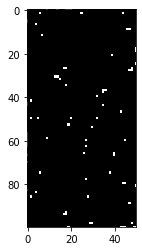

In [68]:
import matplotlib.pyplot as plt
plt.imshow(arrays_rayT)